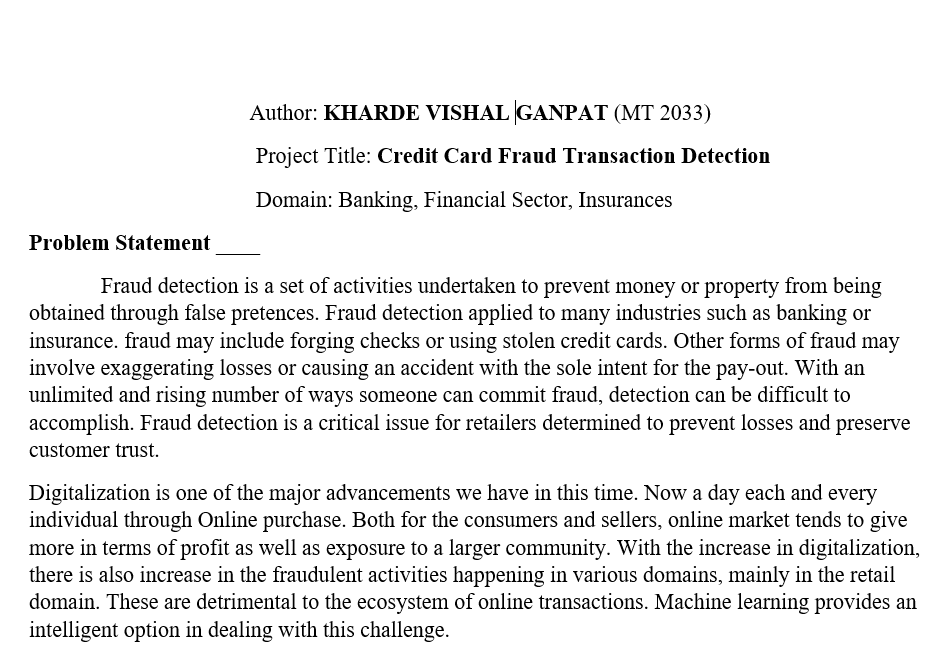

In [ ]:
#imported libraries and loading dataset

In [7]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
284315/492  # imbalanced dataset 

577.8760162601626

<AxesSubplot:xlabel='Class', ylabel='count'>

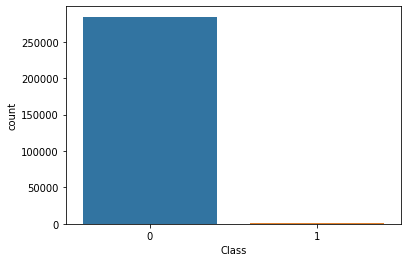

In [9]:
sns.countplot(x=df['Class'],data=df)

Text(0.5, 1.0, 'Correlation heatmap with generated features')

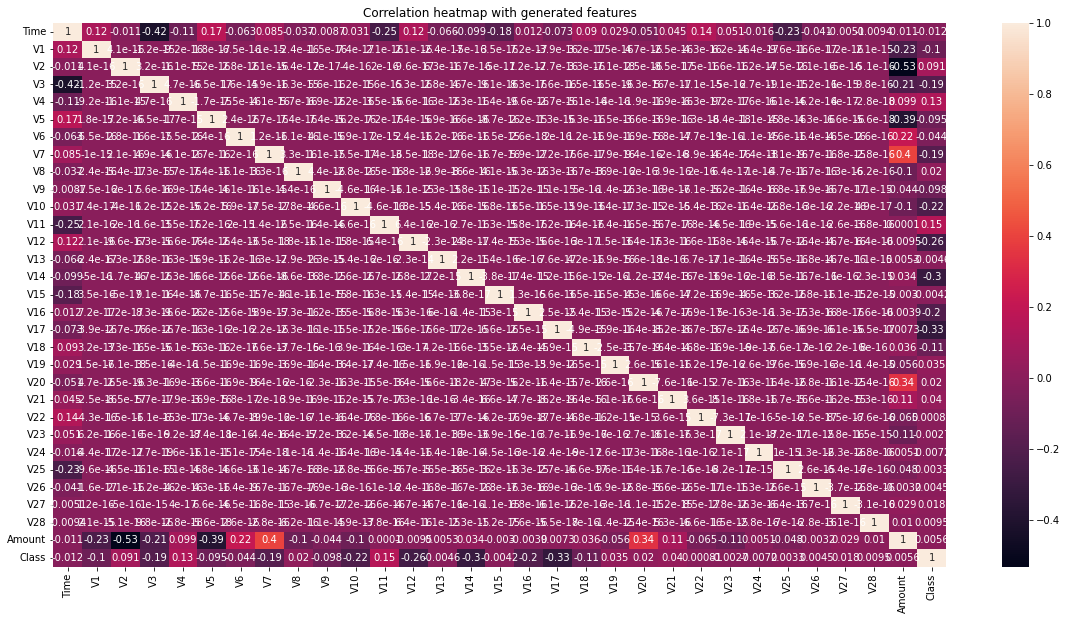

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True).set_title('Correlation heatmap with generated features')

In [12]:
#### Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

#### Cross Validation Like KFOLD and Hyperparameter Tuning

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [14]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [35]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [16]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

c:\users\visha\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.84608077        nan 0.84601593        nan 0.84871569
        nan 0.8315388         nan 0.84378994]
  warnings.warn(
c:\users\visha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [17]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85267    50]
 [   31    95]]
0.9990519995786665
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85317
           1       0.66      0.75      0.70       126

    accuracy                           1.00     85443
   macro avg       0.83      0.88      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
y_train.value_counts()

0    198998
1       366
Name: Class, dtype: int64

In [19]:
class_weight=dict({0:1,1:100})

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [21]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85310     7]
 [   26   100]]
0.9996137776061234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85317
           1       0.93      0.79      0.86       126

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#### Under Sampling

In [22]:
from collections import Counter
Counter(y_train)

Counter({0: 198998, 1: 366})

In [23]:
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

c:\users\visha\appdata\local\programs\python\python39\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 198998, 1: 366})
The number of classes after fit Counter({0: 457, 1: 366})


In [25]:
457*.8


365.6

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [27]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[68278 17039]
 [    8   118]]
0.8004868742904626
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     85317
           1       0.01      0.94      0.01       126

    accuracy                           0.80     85443
   macro avg       0.50      0.87      0.45     85443
weighted avg       1.00      0.80      0.89     85443



##### Over Sampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

c:\users\visha\appdata\local\programs\python\python39\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 198998, 1: 366})
The number of classes after fit Counter({0: 198998, 1: 149248})


In [30]:
199033*.75

149274.75

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [32]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85308     9]
 [   26   100]]
0.9995903701883126
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85317
           1       0.92      0.79      0.85       126

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# link for vedio presentation 